In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame(columns=['vac','non_vac'])
df["vac"]=[27,7]
df["non_vac"]=[6,1]
df.index =["survive","dead"]
df

,vac,non_vac
survive,27,6
dead,7,1


there is a latent probability p|{vac,non_vac} of dying - lets estimate it

In [3]:
p_grid = np.linspace(0.001,0.999,10000)

# Frequentist approach

In [4]:
f_llh = lambda x: df["vac"].loc["survive"]*np.log(1-x)+ df["vac"].loc["dead"]*np.log(x)
llh = f_llh(p_grid)
p_max = p_grid[np.argmax(llh)]
print(f"maximum likelihood solution p_vac={p_max}")

maximum likelihood solution p_vac=0.2059098909890989


In [5]:
f_llh = lambda x: df["non_vac"].loc["survive"]*np.log(1-x)+ df["non_vac"].loc["dead"]*np.log(x)
llh = f_llh(p_grid)
p_max = p_grid[np.argmax(llh)]
print(f"maximum likelihood solution p_non_vac={p_max}")

maximum likelihood solution p_non_vac=0.14282998299829983


## Frequentist would say -> do not take that vaccine!

# Bayesian approach

bayesian solution p_vac=0.22222222222222165


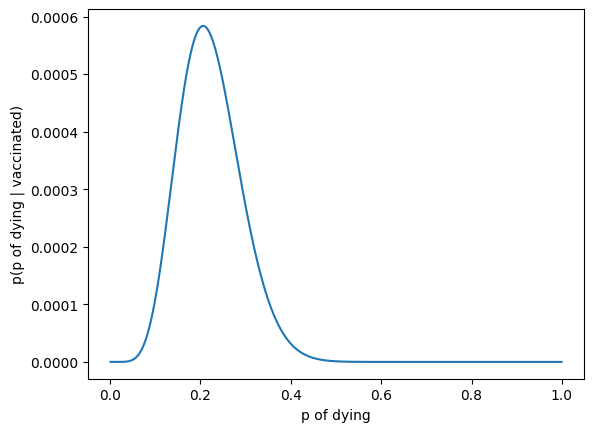

In [6]:
f_llh = lambda x: df["vac"].loc["survive"]*np.log(1-x)+ df["vac"].loc["dead"]*np.log(x)
f_prior = lambda x,a,b: (a-1)*np.log(x)+ (b-1)*np.log(1-x)
log_posterior_unnormalized = f_prior(p_grid,1,1)+f_llh(p_grid)
posterior_unnormalized = np.exp(log_posterior_unnormalized-min(log_posterior_unnormalized))
posterior_vac = posterior_unnormalized/np.sum(posterior_unnormalized)
p_vac = sum(p_grid*posterior_vac)
plt.plot(p_grid,posterior_vac)
plt.xlabel("p of dying")
plt.ylabel("p(p of dying | vaccinated)")
print(f"bayesian solution p_vac={p_vac}")

bayesian solution p_non_vac=0.22222779672992254


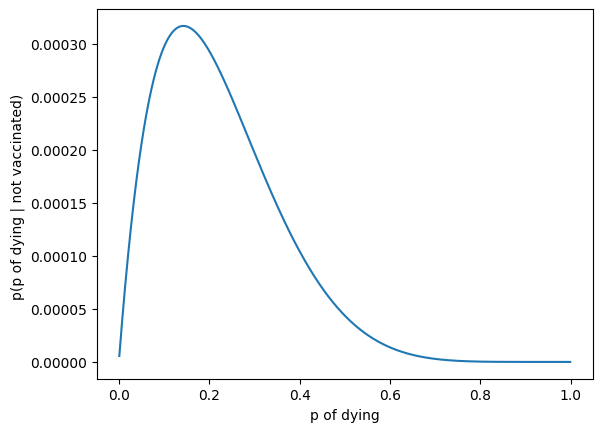

In [7]:
f_llh = lambda x: df["non_vac"].loc["survive"]*np.log(1-x)+ df["non_vac"].loc["dead"]*np.log(x)
f_prior = lambda x,a,b: (a-1)*np.log(x)+ (b-1)*np.log(1-x)
log_posterior_unnormalized = f_prior(p_grid,1,1)+f_llh(p_grid)
posterior_unnormalized = np.exp(log_posterior_unnormalized-min(log_posterior_unnormalized))
posterior_non_vac = posterior_unnormalized/np.sum(posterior_unnormalized)
p_non_vac = sum(p_grid*posterior_non_vac)
plt.plot(p_grid,posterior_non_vac)
plt.xlabel("p of dying")
plt.ylabel("p(p of dying | not vaccinated) ")
print(f"bayesian solution p_non_vac={p_non_vac}")

In [8]:
idx_non_vac = np.where(p_grid>p_vac)[0]
p_p_non_vac_geq_p_vac = np.sum(posterior_non_vac[idx_non_vac])
print(f"Probability that p_non_vac is greater than 0.22 is Pr[p_non_vac>0.22]={np.round(p_p_non_vac_geq_p_vac,2)*100}%")

Probability that p_non_vac is greater than 0.22 is Pr[p_non_vac>0.22]=44.0%


In [11]:
Pr = 0
for i in range(len(p_grid)):
    for j in range(i,len(p_grid)):
        Pr += posterior_vac[i]*posterior_non_vac[j]
print(f"Probability that p_non_vac is greater than p_vac is Pr[p_non_vac>p_vac]={np.round(p_p_non_vac_geq_p_vac,2)*100}%")

Probability that p_non_vac is greater than p_vac is Pr[p_non_vac>p_vac]=44.0%


Interpretation: Neglecting sample size is bad

https://en.wikipedia.org/wiki/Simpson%27s_paradox 

Hypothesis: There was a hidden selection mechanism by which the vaccine was distributed. Very old people that could not say "No" where more likely?